In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16238661072677928658
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2912380519
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14813286830497629860
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


# Transfer Learning Thesis

https://thedatafrog.com/en/articles/image-recognition-transfer-learning/

## Imports

In [18]:
# openCV to concatenate
import cv2

# for image name
import random

# define and move to dataset directory
import os
# the directory where the data is stored
directory = "C:/Users/user/Desktop/Dataset"
os.chdir(directory)

# duplicate combined image to other directory
import shutil

#for stopping code if not the right amount of images
import sys

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np

# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#k-fold cross validation
import pandas as pd                                     #store all images and their class/label
from sklearn.model_selection import StratifiedKFold     
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split    #split the dataset to train-test
import tensorflow as tf                                 #for callbacks

## Crop Image to Reduce Background

We shall crop the image in order to reduce the background so that the egg in the image would be more focused on. The cropping procedure will not affect the size diference of the eggs from one another.

https://stackoverflow.com/questions/61927877/how-to-crop-opencv-image-from-center

In [5]:
tadirect = directory + "/TwoAngleEggs"
#crop width and height
width = 3600
height = 3600

for x in os.listdir(tadirect):
    directory2 = ""
    directory2 = tadirect + "/" + x     #images to be cropped
    #print(directory2)
    
    curdir = os.listdir(directory2)
    
    for z in curdir:
        tempim1 = directory2 + "/" + z
        
        im1 = cv2.imread(tempim1)
        
        center = (im1.shape[0] / 2, im1.shape[1] / 2)
        #print(center)
        x = center[0] - width/2
        y = center[1] - height/2

        #print(x)
        #print(y)
        
        #slicing to perform cropping
        print("cropping " + z + " in dimensions (" + str(width) + "," + str(height) + ")")
        crop_img = im1[int(y):int(y+width), int(x):int(x+height)]
        
        #save and replace the image
        cv2.imwrite(tempim1, crop_img)
        print("crop finish " + z)

print("\nAll finished")

cropping IMG_20210903_205211.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205211.jpg
cropping IMG_20210903_205222.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205222.jpg
cropping IMG_20210903_205244.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205244.jpg
cropping IMG_20210903_205254.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205254.jpg
cropping IMG_20210903_205318.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205318.jpg
cropping IMG_20210903_205330.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205330.jpg
cropping IMG_20210903_205408.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205408.jpg
cropping IMG_20210903_205417.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205417.jpg
cropping IMG_20210903_205447.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205447.jpg
cropping IMG_20210903_205456.jpg in dimensions (3600,3600)
crop finish IMG_20210903_205456.jpg
cropping IMG_20210903_205514.jpg in dimensions (36

crop finish IMG_20210903_212315.jpg
cropping IMG_20210903_212321.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212321.jpg
cropping IMG_20210903_212339.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212339.jpg
cropping IMG_20210903_212347.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212347.jpg
cropping IMG_20210903_212410.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212410.jpg
cropping IMG_20210903_212421.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212421.jpg
cropping IMG_20210903_212454.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212454.jpg
cropping IMG_20210903_212502.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212502.jpg
cropping IMG_20210903_212529.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212529.jpg
cropping IMG_20210903_212537.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212537.jpg
cropping IMG_20210903_212559.jpg in dimensions (3600,3600)
crop finish IMG_20210903_212559.jpg
cropping IMG_2

crop finish IMG_20210904_014504.jpg
cropping IMG_20210904_014519.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014519.jpg
cropping IMG_20210904_014526.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014526.jpg
cropping IMG_20210904_014539.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014539.jpg
cropping IMG_20210904_014544.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014544.jpg
cropping IMG_20210904_014602.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014602.jpg
cropping IMG_20210904_014607.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014607.jpg
cropping IMG_20210904_014623.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014623.jpg
cropping IMG_20210904_014629.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014629.jpg
cropping IMG_20210904_014646.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014646.jpg
cropping IMG_20210904_014652.jpg in dimensions (3600,3600)
crop finish IMG_20210904_014652.jpg
cropping IMG_2

crop finish IMG_20210904_025537.jpg
cropping IMG_20210904_025546.jpg in dimensions (3600,3600)
crop finish IMG_20210904_025546.jpg
cropping IMG_20210904_025602.jpg in dimensions (3600,3600)
crop finish IMG_20210904_025602.jpg
cropping IMG_20210904_025610.jpg in dimensions (3600,3600)
crop finish IMG_20210904_025610.jpg
cropping IMG_20210904_025624.jpg in dimensions (3600,3600)
crop finish IMG_20210904_025624.jpg
cropping IMG_20210904_025643.jpg in dimensions (3600,3600)
crop finish IMG_20210904_025643.jpg
cropping IMG_20210904_025711.jpg in dimensions (3600,3600)
crop finish IMG_20210904_025711.jpg
cropping IMG_20210904_025720.jpg in dimensions (3600,3600)
crop finish IMG_20210904_025720.jpg
cropping IMG_20210904_033942.jpg in dimensions (3600,3600)
crop finish IMG_20210904_033942.jpg
cropping IMG_20210904_033950.jpg in dimensions (3600,3600)
crop finish IMG_20210904_033950.jpg
cropping IMG_20210904_034005.jpg in dimensions (3600,3600)
crop finish IMG_20210904_034005.jpg
cropping IMG_2

crop finish IMG_20210904_044911.jpg
cropping IMG_20210912_224007.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224007.jpg
cropping IMG_20210912_224014.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224014.jpg
cropping IMG_20210912_224105.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224105.jpg
cropping IMG_20210912_224112.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224112.jpg
cropping IMG_20210912_224207.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224207.jpg
cropping IMG_20210912_224215.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224215.jpg
cropping IMG_20210912_224239.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224239.jpg
cropping IMG_20210912_224245.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224245.jpg
cropping IMG_20210912_224305.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224305.jpg
cropping IMG_20210912_224313.jpg in dimensions (3600,3600)
crop finish IMG_20210912_224313.jpg
cropping IMG_2

crop finish IMG_20210904_200034.jpg
cropping IMG_20210904_200042.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200042.jpg
cropping IMG_20210904_200152.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200152.jpg
cropping IMG_20210904_200158.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200158.jpg
cropping IMG_20210904_200220.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200220.jpg
cropping IMG_20210904_200230.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200230.jpg
cropping IMG_20210904_200256.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200256.jpg
cropping IMG_20210904_200303.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200303.jpg
cropping IMG_20210904_200324.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200324.jpg
cropping IMG_20210904_200331.jpg in dimensions (3600,3600)
crop finish IMG_20210904_200331.jpg
cropping IMG_20210909_191755.jpg in dimensions (3600,3600)
crop finish IMG_20210909_191755.jpg
cropping IMG_2

crop finish IMG_20210909_200611.jpg
cropping IMG_20210909_200630.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200630.jpg
cropping IMG_20210909_200637.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200637.jpg
cropping IMG_20210909_200657.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200657.jpg
cropping IMG_20210909_200704.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200704.jpg
cropping IMG_20210909_200733.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200733.jpg
cropping IMG_20210909_200740.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200740.jpg
cropping IMG_20210909_200800.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200800.jpg
cropping IMG_20210909_200806.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200806.jpg
cropping IMG_20210909_200830.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200830.jpg
cropping IMG_20210909_200836.jpg in dimensions (3600,3600)
crop finish IMG_20210909_200836.jpg
cropping IMG_2

## Concatenate two angles of egg

two images of an egg are taken, one at its front and one at its back.

In [3]:
#"""
tadirect = directory + "/TwoAngleEggs"

#check if there is the right amount of images (1 for each angle of egg)
for w in os.listdir(tadirect):
    directory2 = ""
    directory2 = tadirect + "/" + w
    curdir = os.listdir(directory2)

    #number of files in directory
    filecnt = len([name for name in curdir])
    
    if filecnt%2 == 1:
        print("ERROR (" + w + "): Incorrect number of images.")
        sys.exit()

for x in os.listdir(tadirect):
    directory2 = ""
    directory2 = tadirect + "/" + x                            #where the two images of two angles of egg is stored
    directory3 = directory  + "/CombinedTwoAngleEggs/" + x     #where to put the combined image of the angles
    #directory4 = directory  + "/ToBeUsed/" + x                 #where combined and data augmented of the image are stored
    #print(directory2)
    
    curdir = os.listdir(directory2)
    #print(curdir)
    
    #number of files in directory
    filecnt = len([name for name in curdir])
    
    for y in range(filecnt):
        if y%2 == 0:
            #print(directory2 + "/" + curdir[y])
            tempim1 = directory2 + "/" + curdir[y]
            im1 = cv2.imread(tempim1)
            #im1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
            
            #print(directory2 + "/" + curdir[y+1])
            tempim2 = directory2 + "/" + curdir[y+1]
            im2 = cv2.imread(tempim2)
            
            # vertically concatenates images 
            # of same width 
            
            #resize for ResNet50
            width = 224
            height = 224

            dim = (width,height)
            
            im_v = cv2.vconcat([cv2.resize(im1, dim), cv2.resize(im2, dim)])
            #im_v = cv2.vconcat(im1,im2)
            
            # show the output image
            #cv2.imshow("image",im_v)
            #save image
            
            #create folder to store concatenated images if not existing
            newpath = directory3 + "2"
            if not os.path.exists(newpath):
                os.makedirs(newpath)
            """    
            newpath2 = directory4 + "3"
            if not os.path.exists(newpath2):
                os.makedirs(newpath2)
            """
            
            combine_img = newpath + "/IMG_" + str(random.randint(0,99999999)) + "_" + str(random.randint(0,999999)) + ".jpg"
            
            cv2.imwrite(combine_img,cv2.resize(im_v, dim))
            #shutil.copy2(combine_img, newpath2)bv
            
            print(curdir[y] + " and " + curdir[y+1] + " combined.")

print("All finished")
#"""
           
"""
im1 = cv2.imread("C:/Users/user/Desktop/Dataset/Balut-penoy/IMG_20210902_081744.jpg")
im2 = cv2.imread("C:/Users/user/Desktop/Dataset/Balut-penoy/IMG_20210902_081801.jpg")
#im1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)

width = 224
height = 224

dim = (width,height)

im_v = cv2.vconcat([cv2.resize(im1, dim), cv2.resize(im2, dim)])

cv2.imshow("wew",im_v)
cv2.waitKey()

#create a new image from the images
#cv2.imwrite('C:/Users/user/Desktop/Dataset/Balut-penoy/Lolo3.jpg', im_v)
"""

print()

IMG_20210903_205211.jpg and IMG_20210903_205222.jpg combined.
IMG_20210903_205244.jpg and IMG_20210903_205254.jpg combined.
IMG_20210903_205318.jpg and IMG_20210903_205330.jpg combined.
IMG_20210903_205408.jpg and IMG_20210903_205417.jpg combined.
IMG_20210903_205447.jpg and IMG_20210903_205456.jpg combined.
IMG_20210903_205514.jpg and IMG_20210903_205522.jpg combined.
IMG_20210903_205546.jpg and IMG_20210903_205555.jpg combined.
IMG_20210903_205617.jpg and IMG_20210903_205629.jpg combined.
IMG_20210903_205653.jpg and IMG_20210903_205704.jpg combined.
IMG_20210903_205741.jpg and IMG_20210903_205750.jpg combined.
IMG_20210903_205849.jpg and IMG_20210903_205901.jpg combined.
IMG_20210903_205925.jpg and IMG_20210903_205934.jpg combined.
IMG_20210903_205956.jpg and IMG_20210903_210006.jpg combined.
IMG_20210903_210030.jpg and IMG_20210903_210037.jpg combined.
IMG_20210903_210100.jpg and IMG_20210903_210112.jpg combined.
IMG_20210903_210203.jpg and IMG_20210903_210211.jpg combined.
IMG_2021

IMG_20210904_025711.jpg and IMG_20210904_025720.jpg combined.
IMG_20210904_033942.jpg and IMG_20210904_033950.jpg combined.
IMG_20210904_034005.jpg and IMG_20210904_034019.jpg combined.
IMG_20210904_034032.jpg and IMG_20210904_034054.jpg combined.
IMG_20210904_034140.jpg and IMG_20210904_034148.jpg combined.
IMG_20210904_034204.jpg and IMG_20210904_034213.jpg combined.
IMG_20210904_034231.jpg and IMG_20210904_034239.jpg combined.
IMG_20210904_034254.jpg and IMG_20210904_034302.jpg combined.
IMG_20210904_034323.jpg and IMG_20210904_034330.jpg combined.
IMG_20210904_034350.jpg and IMG_20210904_034358.jpg combined.
IMG_20210904_034415.jpg and IMG_20210904_034423.jpg combined.
IMG_20210904_034444.jpg and IMG_20210904_034452.jpg combined.
IMG_20210904_034515.jpg and IMG_20210904_034524.jpg combined.
IMG_20210904_034543.jpg and IMG_20210904_034555.jpg combined.
IMG_20210904_034613.jpg and IMG_20210904_034621.jpg combined.
IMG_20210904_034637.jpg and IMG_20210904_034646.jpg combined.
IMG_2021

IMG_20210909_200909.jpg and IMG_20210909_200916.jpg combined.
IMG_20210912_220619.jpg and IMG_20210912_220628.jpg combined.
IMG_20210912_220738.jpg and IMG_20210912_220749.jpg combined.
IMG_20210912_220807.jpg and IMG_20210912_220814.jpg combined.
IMG_20210912_220835.jpg and IMG_20210912_220846.jpg combined.
IMG_20210912_220905.jpg and IMG_20210912_220912.jpg combined.
IMG_20210912_221046.jpg and IMG_20210912_221058.jpg combined.
IMG_20210912_221119.jpg and IMG_20210912_221127.jpg combined.
IMG_20210912_221148.jpg and IMG_20210912_221154.jpg combined.
IMG_20210912_221212.jpg and IMG_20210912_221218.jpg combined.
IMG_20210912_221244.jpg and IMG_20210912_221250.jpg combined.
IMG_20210912_221309.jpg and IMG_20210912_221317.jpg combined.
IMG_20210912_221344.jpg and IMG_20210912_221352.jpg combined.
IMG_20210912_221417.jpg and IMG_20210912_221424.jpg combined.
IMG_20210912_221447.jpg and IMG_20210912_221454.jpg combined.
IMG_20210912_221519.jpg and IMG_20210912_221526.jpg combined.
IMG_2021

## Put Dataset in a Dataframe and Place Images on a Single Folder

The directory of the images are needed to be put on a dataframe together with its class (the folder where it is placed). This way, it is easier to split it to train and test set, and do transfer learning with K-fold cross validation. The images are needed to be on one folder only so we copy all images to a new folder.

In [19]:
combdirect = directory + "/CombinedTwoAngleEggs"
fulldataset = directory + "/ToBeUsed"

if not os.path.exists(fulldataset):
    os.makedirs(fulldataset)

#needed for k-fold validation later on
image = []

if not os.path.exists(combdirect):
    print("Folder does not exist. Run the code above.")
    sys.exit()

for x in os.listdir(combdirect):
    combdirect2 = combdirect + "/" + x
    for y in os.listdir(combdirect2):
        if x == "Balut-penoy2":
            lbl = "0"
        elif x == "Salted egg2":
            lbl = "1"
        else:
            lbl = "2"
         
        #print(combdirect2 + "/" + y)
        
        #copy that image to the full dataset folder
        shutil.copy2(combdirect2 + "/" + y, fulldataset)
        
        #append to image array
        image.append([fulldataset + "/" + y,lbl])

In [20]:
df = pd.DataFrame(image,columns=['filename','label'])
df

,filename,label
0,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_102...,0
1,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_131...,0
2,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_139...,0
3,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_144...,0
4,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_150...,0
...,...,...
295,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_950...,2
296,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_950...,2
297,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_971...,2
298,C:/Users/user/Desktop/Dataset/ToBeUsed/IMG_978...,2


In [21]:
print(df.isna().any())

filename    False
label       False
dtype: bool


## K-fold validation on train set

https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538

In [22]:
Y = df[['label']]

kf = KFold(n_splits = 10, random_state = 7, shuffle = True)
                         
skf = StratifiedKFold(n_splits = 10, random_state = 7, shuffle = True)

In [23]:
print(Y['label'].value_counts())

0    100
1    100
2    100
Name: label, dtype: int64


## Data Augmentation

We will apply data augmentation of the dataset per epoch in order to increase the accuracy of the model

In [24]:
resnet50 = keras.applications.resnet50

imgdatagen = ImageDataGenerator(
        preprocessing_function = resnet50.preprocess_input,
        horizontal_flip = True,
        vertical_flip = True,
    )

## Create Plot History

Plot history will display the training and validation accuracy, and training and validation loss in every epoch in a fold.

In [25]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.legend(['train_accuracy','val_accuracy'])
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.legend(['train_loss','val_loss'])
    
    plt.show() 

## Train Model

train the model with K-fold Cross Validation. Parameters can be set each and every training to get the best accuracy as possible. Data generators are needed in order to do data augmentation through the use of the ImageDataGenerator stated above.

Found 270 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.
Fold number 1
Epoch 1/20
9/9 [==============================] - 10s 553ms/step - loss: 1.7447 - accuracy: 0.3259 - val_loss: 1.4335 - val_accuracy: 0.3333

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to C:/Users/user/Desktop/saved_models_2\model_1.h5


C:\Users\user\anaconda3\envs\tensorflow25\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
9/9 [==============================] - 3s 369ms/step - loss: 1.6912 - accuracy: 0.3370 - val_loss: 1.3705 - val_accuracy: 0.3333

Epoch 00002: val_accuracy did not improve from 0.33333
Epoch 3/20
9/9 [==============================] - 3s 360ms/step - loss: 1.5967 - accuracy: 0.3259 - val_loss: 1.3365 - val_accuracy: 0.3333

Epoch 00003: val_accuracy did not improve from 0.33333
Epoch 4/20
9/9 [==============================] - 3s 304ms/step - loss: 1.6968 - accuracy: 0.3074 - val_loss: 1.3119 - val_accuracy: 0.3333

Epoch 00004: val_accuracy did not improve from 0.33333
Epoch 5/20
9/9 [==============================] - 3s 352ms/step - loss: 1.6408 - accuracy: 0.3296 - val_loss: 1.3130 - val_accuracy: 0.3333

Epoch 00005: val_accuracy did not improve from 0.33333
Epoch 6/20
9/9 [==============================] - 4s 407ms/step - loss: 1.6382 - accuracy: 0.3370 - val_loss: 1.2232 - val_accuracy: 0.3333

Epoch 00006: val_accuracy did not improve from 0.33333
Epoch 7/20
9/9 [====

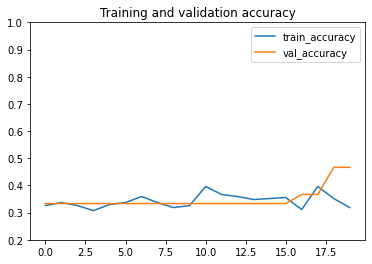

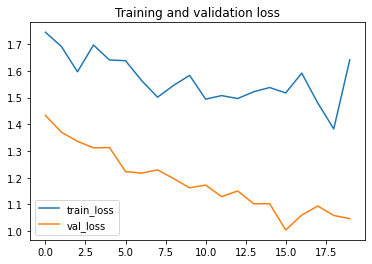

1/1 [==============================] - 0s 387ms/step - loss: 1.0723 - accuracy: 0.4000
{'loss': 1.0723365545272827, 'accuracy': 0.4000000059604645}
Found 270 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.
Fold number 2
Epoch 1/20
9/9 [==============================] - 9s 508ms/step - loss: 1.5684 - accuracy: 0.3667 - val_loss: 1.3107 - val_accuracy: 0.3667

Epoch 00001: val_accuracy improved from -inf to 0.36667, saving model to C:/Users/user/Desktop/saved_models_2\model_2.h5
Epoch 2/20
9/9 [==============================] - 3s 305ms/step - loss: 1.5692 - accuracy: 0.3407 - val_loss: 1.2416 - val_accuracy: 0.3667

Epoch 00002: val_accuracy did not improve from 0.36667
Epoch 3/20
9/9 [==============================] - 3s 356ms/step - loss: 1.6043 - accuracy: 0.3481 - val_loss: 1.2344 - val_accuracy: 0.3667

Epoch 00003: val_accuracy did not improve from 0.36667
Epoch 4/20
9/9 [==============================] - 3s 303ms/step -

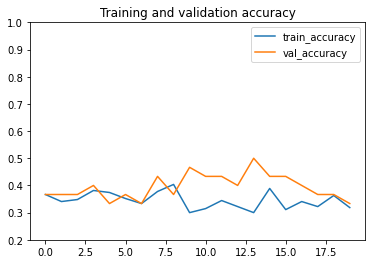

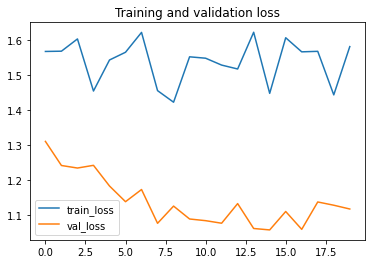

1/1 [==============================] - 0s 378ms/step - loss: 1.0660 - accuracy: 0.4000
{'loss': 1.065989375114441, 'accuracy': 0.4000000059604645}
Found 270 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.
Fold number 3
Epoch 1/20
9/9 [==============================] - 11s 514ms/step - loss: 1.5731 - accuracy: 0.3519 - val_loss: 1.2508 - val_accuracy: 0.3000

Epoch 00001: val_accuracy improved from -inf to 0.30000, saving model to C:/Users/user/Desktop/saved_models_2\model_3.h5
Epoch 2/20
9/9 [==============================] - 3s 299ms/step - loss: 1.6511 - accuracy: 0.3519 - val_loss: 1.2214 - val_accuracy: 0.3000

Epoch 00002: val_accuracy did not improve from 0.30000
Epoch 3/20
9/9 [==============================] - 3s 300ms/step - loss: 1.7161 - accuracy: 0.2778 - val_loss: 1.2443 - val_accuracy: 0.2667

Epoch 00003: val_accuracy did not improve from 0.30000
Epoch 4/20
9/9 [==============================] - 3s 340ms/step -

KeyboardInterrupt: 

In [29]:
#initialize parameters
VALIDATION_ACCURACY = []                          #store all validation_accuracy
VALIDATION_LOSS = []                              #store all validation_loss
image_dir = directory + "/ToBeUsed"               #where the train set images are stored
batch_size = 32                                   #batch size
fold_var = 1                                      #number of fold of the model
n = len(df)                                       #number of data in train set
num_epochs = 20                                   #number of epochs
dim = (224,224)                                   #required dimensions for process_unit (ResNet50)
lr = 0.00001                                      #learning rate Adamax

#===========if exist, create new one for another set of models with new parameters======================

#directory where models per set parameters are stored
gen_dir = "C:/Users/user/Desktop"

save_cur = ""  #check if there is any saved_models folders

for x in os.listdir(gen_dir):
    if "saved_models" in x:
        #print(x)
        save_cur = x

#save_dir is where the created models using the current set of parameters are added        

svnum = 0
if save_cur == "":
    save_dir = gen_dir + "/saved_models_1"
    #print(save_dir)
    os.makedirs(save_dir)
else:
    for word in save_cur.split("_"):
        if word.isdigit():
            svnum = int(word)
            
    save_dir = gen_dir + "/saved_models_" + str(svnum + 1)
    #print(save_dir)
    os.makedirs(save_dir)

#=========================================================================================================    
    
for train_index, val_index in kf.split(np.zeros(n),Y):
    #print(train_index)
    #print(val_index)
    training_data = df.iloc[train_index]
    
    #print(training_data)
    
    validation_data = df.iloc[val_index]
    
    #print(validation_data)

    train_data_generator = imgdatagen.flow_from_dataframe(training_data, directory = image_dir,
                               x_col = "filename", y_col = "label",
                              class_mode = "categorical", target_size = dim, batch_size = batch_size,
                                shuffle = False)
    valid_data_generator  = imgdatagen.flow_from_dataframe(validation_data, directory = image_dir,
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", target_size = dim, batch_size = batch_size,
                                shuffle = False)

    # CREATE NEW MODEL
    conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
    for layer in conv_model.layers:
        layer.trainable = False
        
    #print(conv_model.output_shape)
    x = keras.layers.Flatten()(conv_model.output)
    x = keras.layers.Dense(100, activation='relu')(x)
    x = keras.layers.Dense(100, activation='relu')(x)
    x = keras.layers.Dropout(0.2)(x) #to further reduce overfitting

    predictions = keras.layers.Dense(3, activation='softmax')(x)
    full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
    
    #full_model.summary()
    
    # COMPILE NEW MODEL
    full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(learning_rate=lr),
                  metrics=['accuracy']) #categorical_crossentropy cause it is more than 2 classes

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint((save_dir+"/"+ "model_" + str(fold_var) + ".h5"), 
                            monitor='val_accuracy', verbose=1, 
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
   
    print("Fold number " + str(fold_var))

    # FIT THE MODEL
    history = full_model.fit(train_data_generator,
                             epochs=num_epochs,
                             callbacks=callbacks_list,
                             validation_data=valid_data_generator)
    
    #PLOT HISTORY
    plot_history(history, yrange=(0.2,1))

    # LOAD BEST MODEL to evaluate the performance of the model
    full_model.load_weights(save_dir+"/model_"+str(fold_var)+".h5")
    
    results = full_model.evaluate(valid_data_generator)
    results = dict(zip(full_model.metrics_names,results))
    
    print(results)
    
    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    tf.keras.backend.clear_session()

    fold_var += 1    

In [14]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [15]:
from PIL import Image
print(Image.__file__)

C:\Users\user\anaconda3\envs\theshit\lib\site-packages\PIL\Image.py


In [16]:
import Image
print(Image.__file__)

C:\Users\user\anaconda3\envs\theshit\lib\site-packages\PIL\Image.py


In [11]:
print("Validation Accuracy of All Folds:")
print(VALIDATION_ACCURACY)
print("Validation Loss of All Folds:")
print(VALIDATION_LOSS)

Validation Accuracy of All Folds:
[0.4, 0.45, 0.38333333, 0.38333333, 0.35]
Validation Loss of All Folds:
[1.9606613516807556, 1.054253727197647, 1.3259955644607544, 1.229594647884369, 1.3008553981781006]
